In [1]:
# install PyAudio http://people.csail.mit.edu/hubert/pyaudio/
# pip install pyaudio
import pyaudio
import wave
import sys

# default settings for record and playback
CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 22050

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  import sys


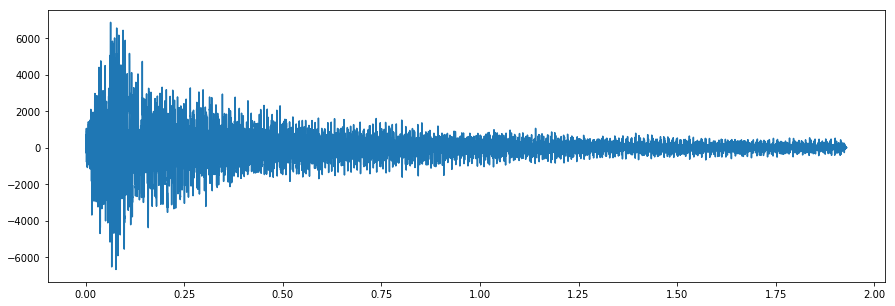

In [2]:
import numpy as np
import matplotlib.pyplot as plt

wave_file = "datasets/sound/chord.wav"
wf = wave.open(wave_file, 'rb')
data = wf.readframes(-1)
signal = np.frombuffer(data, 'Int16')
time = [i / RATE for i in range(len(signal))]
plt.figure(figsize=(15,5))
plt.plot(time, signal)
plt.show()

In [ ]:
## 1. Convert to frequencies
## 2. find major frequencies
## 2a. Do it automatically (with code, not with your eyes)
## 3. Can you say what is the chord?